In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [3]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('Australia Wheat Yield History Full.csv')
foam

,Year,Nutrient - Nitrogen (kg/ha),Nutrient - Phosphate (kg/ha),Nutrient - Potash (kg/ha),Annual Wheat Yield (T/ha),Annual Mean Rainfall (mm)
0,1992,29.76,48.09,8.98,1.7812,447.9
1,1993,32.69,44.89,10.18,1.9658,488.0
2,1994,32.32,51.57,12.17,1.1356,338.7
3,1995,39.40,57.13,13.54,1.7899,518.1
4,1996,42.49,51.19,10.61,2.1673,462.3
5,1997,39.72,52.02,12.05,1.8412,514.2
6,1998,45.33,48.52,10.74,1.9153,548.9
7,1999,46.51,45.73,9.28,2.0066,578.8
8,2000,40.01,46.97,9.13,1.8209,710.6
9,2001,42.17,48.82,9.87,1.8209,542.8


In [13]:
# Assign the data to X and y

X = foam[["Nutrient - Nitrogen (kg/ha)", "Nutrient - Phosphate (kg/ha)", 
        "Nutrient - Potash (kg/ha)", "Annual Mean Rainfall (mm)"]]
y = foam["Annual Wheat Yield (T/ha)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(29, 4) (29, 1)


In [14]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [7]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2243448427639666
Testing Score: 0.34472780606737485


Text(0.5, 1.0, 'Residual Plot')

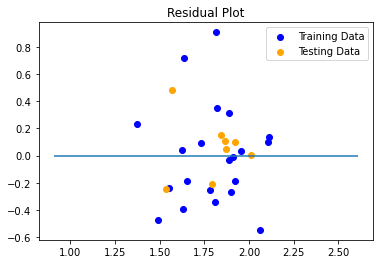

In [16]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))